Импорт библиотек

In [12]:
import numpy as np
import matplotlib.pyplot as plt

Диаграмма переходов и матрица

In [13]:
P = np.array([
    [0.5, 0.2, 0.2, 0.1],  # Sunny
    [0.3, 0.4, 0.1, 0.2],  # Rainy
    [0.1, 0.3, 0.4, 0.2],  # Cloudy
    [0.2, 0.1, 0.3, 0.4]   # Windy
])

Моделирование цепи

In [14]:
def simulate_markov(P, initial_vec, eps=1e-5, max_steps=1000):
    old = initial_vec.copy()
    history = [old]
    for _ in range(max_steps):
        new = old @ P
        history.append(new)
        if np.sqrt(np.sum((new - old)**2)) < eps:
            break
        old = new
    return np.array(history)

# Начальные векторы
initial_vectors = [
    np.array([1, 0, 0, 0]),
    np.array([0.25, 0.25, 0.25, 0.25]),
    np.array([0, 0.5, 0.5, 0])
]

# Моделирование
results = []
for vec in initial_vectors:
    results.append(simulate_markov(P, vec))

Построение графиков

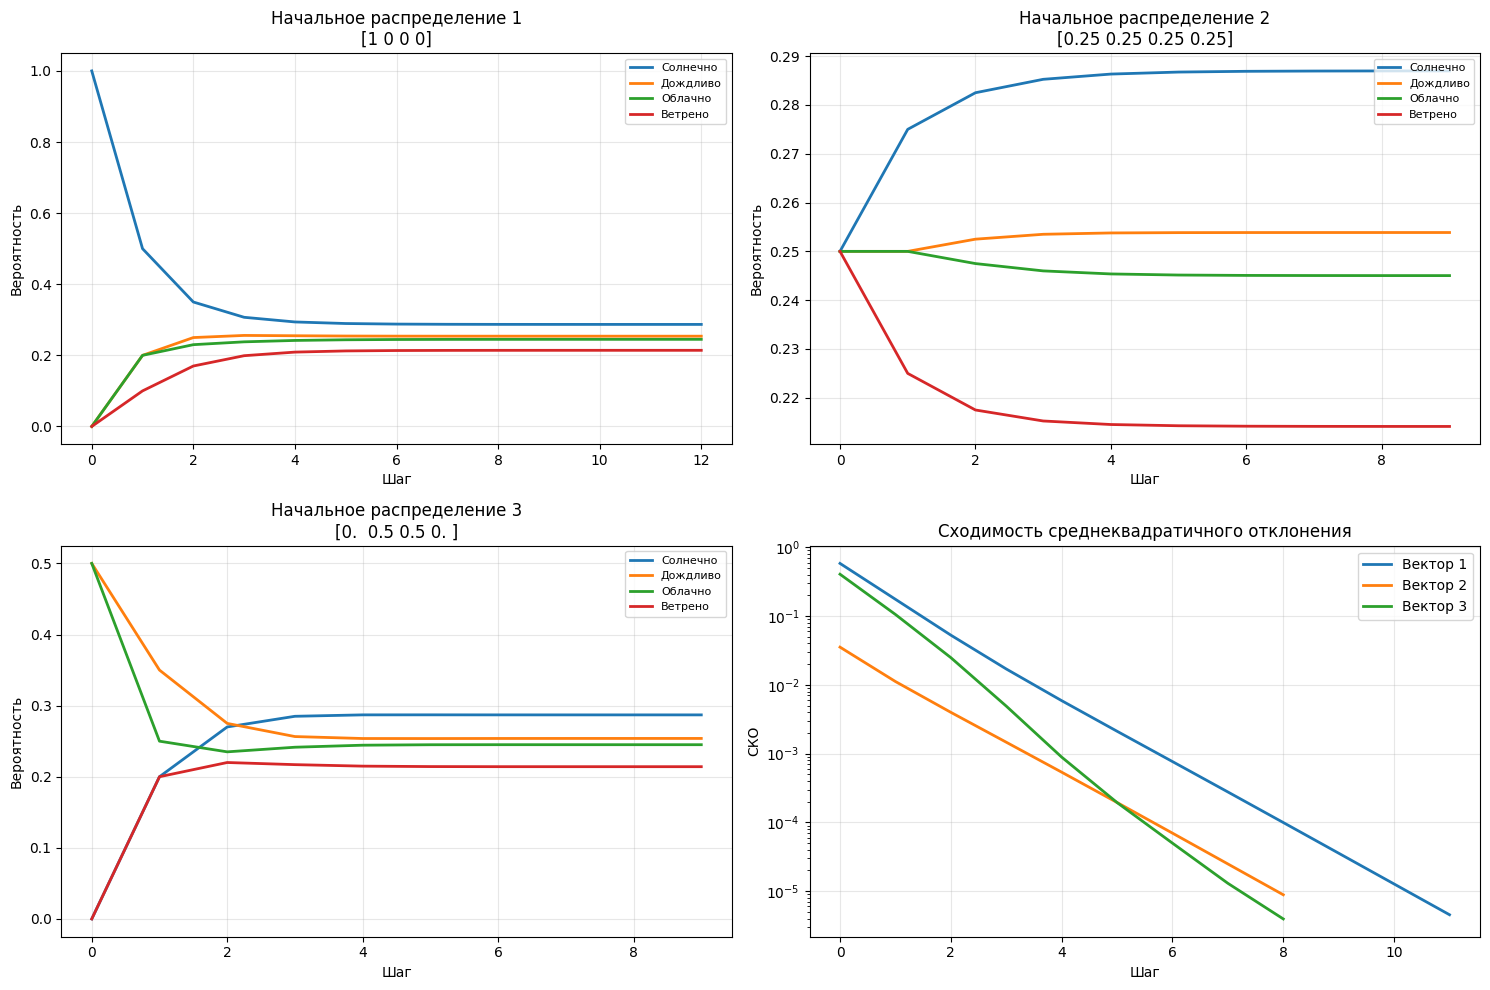

In [15]:
states = ['Солнечно', 'Дождливо', 'Облачно', 'Ветрено']
plt.figure(figsize=(15, 10))

# Графики вероятностей для каждого начального вектора
for i, res in enumerate(results):
    plt.subplot(2, 2, i+1)
    for j in range(4):
        plt.plot(res[:, j], label=states[j], linewidth=2)
    plt.title(f'Начальное распределение {i+1}\n{initial_vectors[i]}')
    plt.xlabel('Шаг')
    plt.ylabel('Вероятность')
    plt.grid(alpha=0.3)
    plt.legend(loc='upper right', fontsize=8)

# График среднеквадратичного отклонения
plt.subplot(2, 2, 4) 
for i, res in enumerate(results):
    diffs = [np.sqrt(np.sum((res[k] - res[k-1])**2)) for k in range(1, len(res))]
    plt.plot(diffs, label=f'Вектор {i+1}', linewidth=2)
plt.title('Сходимость среднеквадратичного отклонения')
plt.xlabel('Шаг')
plt.ylabel('СКО')
plt.yscale('log')
plt.grid(alpha=0.3)
plt.legend()

plt.tight_layout()
plt.show()

Аналитическое решение

In [16]:
A = P.T - np.eye(4)
A[-1] = np.ones(4)  # Замена последнего уравнения на нормировку
b = np.zeros(4)
b[-1] = 1

stationary = np.linalg.solve(A, b)
print("Стационарное распределение:", stationary)

Стационарное распределение: [0.28697572 0.25386313 0.24503311 0.21412804]


Сравнение результатов

In [17]:
print("\nСравнение с моделированием:")
for i, res in enumerate(results):
    final = res[-1]
    diff = np.sqrt(np.sum((final - stationary)**2))
    print(f"Вектор {i+1}: Ошибка {diff:.6f}")


Сравнение с моделированием:
Вектор 1: Ошибка 0.000003
Вектор 2: Ошибка 0.000005
Вектор 3: Ошибка 0.000002
